# Actividad Práctica 2 del Examen Módulo 1:
Selecciona un dataset de tu preferencia y aplica limpieza de datos tal como hicimos en el notebook [Limpieza_de_datos.ipynb](https://colab.research.google.com/drive/1IrNQk7o_L708knjaqvAoPgipN_KB9LN1?usp=sharing).

**Requisitos del dataset:**
* Tener al menos 100 datos.
* Tener al menos 3 columnas categoricas de tipo string.
* Tener valores perdidos.
* Tener más de 10 columnas.
* Ser un dataset real.  

Los resultados se presentarán en la clase del **Jueves 7 de Diciembre** en el horario de la clase.

## Paso 1: Montamos el Drive

In [1]:
# Montamos el Drive al Notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# Cambiamos de directorio al Drive
import os
os.chdir("drive/MyDrive/Diplomado/")
!ls

'Actividades en clase'	 Examen_práctico1._KevinDiaz.ipynb   lego.png
 casco.png		 Examen_práctico2_KevinDiaz.ipynb    onlineShopping.csv


## Paso 2. Cargamos las librerias

In [79]:
# Importamos pandas
import pandas as pd
# Importamos una librería de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Paso 3. Cargamos los datos

In [6]:
# Agrega la liga de descarga del dataset:
dataset_url = "https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset/data"

In [5]:
# Carga la ruta del dataset
target_image = '/content/drive/MyDrive/Diplomado/onlineShopping.png'

In [7]:
# Cargamos el dataset con PANDAS
df = pd.read_csv("onlineShopping.csv")

## Paso 4. Fase de exploración de los datos

In [9]:
#Primero visualizamos los primeros datos.
df.head(5)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,01/01/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,01/01/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,01/01/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,01/01/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,01/01/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,01/01/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,01/01/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,01/01/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,01/01/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,01/01/2019,4500.0,2424.5,1,ELEC10,10.0


In [10]:
# Verificamos la cantidad de datos y columnas
df.shape

(52955, 21)

In [11]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64')]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [13]:
df['Avg_Price']

0        153.71
1        153.71
2        122.77
3         81.50
4        153.71
          ...  
52950       NaN
52951       NaN
52952       NaN
52953       NaN
52954       NaN
Name: Avg_Price, Length: 52955, dtype: float64

In [14]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


## Paso 5. Fase de limpieza de los datos

In [15]:
#comenzamos seleccionando solo las variables de interes
df= df[["Gender","Location","Product_Description","Product_Category","Avg_Price","Month"]]

In [17]:
df.head()

,Gender,Location,Product_Description,Product_Category,Avg_Price,Month
0,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,153.71,1
1,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,153.71,1
2,M,Chicago,Nest Cam Outdoor Security Camera - USA,Nest-USA,122.77,1
3,M,Chicago,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,81.50,1
4,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,153.71,1


In [21]:
df.shape

(52955, 6)

#Aqui convertiremos a valor númerico la columna de categorias

In [22]:
# Obtenemos los diferentes tipos de cuartos
product_categories = df["Product_Category"].unique()
product_categories

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Waze', 'Headgear', 'Fun', 'Notebooks & Journals', 'Google',
       'Nest-Canada', 'Bottles', 'Gift Cards', 'More Bags', 'Backpacks',
       'Housewares', 'Android', 'Nest', 'Accessories', 'Notebooks'],
      dtype=object)

In [23]:
# Generamos un diccionario con cada tipo de cuarto
dict_categories = dict(zip(product_categories,range(len(product_categories))))
dict_categories

{'Nest-USA': 0,
 'Office': 1,
 'Apparel': 2,
 'Bags': 3,
 'Drinkware': 4,
 'Lifestyle': 5,
 'Waze': 6,
 'Headgear': 7,
 'Fun': 8,
 'Notebooks & Journals': 9,
 'Google': 10,
 'Nest-Canada': 11,
 'Bottles': 12,
 'Gift Cards': 13,
 'More Bags': 14,
 'Backpacks': 15,
 'Housewares': 16,
 'Android': 17,
 'Nest': 18,
 'Accessories': 19,
 'Notebooks': 20}

In [25]:
# Convertimos a valor númerico el tipo de cuarto
df["Product_Category"] = [dict_categories[product] for product in df["Product_Category"]]

df.head()

,Gender,Location,Product_Description,Product_Category,Avg_Price,Month
0,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,0,153.71,1
1,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,0,153.71,1
2,M,Chicago,Nest Cam Outdoor Security Camera - USA,0,122.77,1
3,M,Chicago,Nest Protect Smoke + CO White Battery Alarm-USA,0,81.50,1
4,M,Chicago,Nest Learning Thermostat 3rd Gen-USA - Stainle...,0,153.71,1


#Se modifican los valores perdidos


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               52924 non-null  object 
 1   Location             52924 non-null  object 
 2   Product_Description  52924 non-null  object 
 3   Product_Category     52955 non-null  int64  
 4   Avg_Price            52924 non-null  float64
 5   Month                52955 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [45]:
# Rellenamos los valores perdidos con un valor neutro
df["Gender"].fillna('M', inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               52955 non-null  object 
 1   Location             52924 non-null  object 
 2   Product_Description  52924 non-null  object 
 3   Product_Category     52955 non-null  int64  
 4   Avg_Price            52955 non-null  float64
 5   Month                52955 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [30]:
# Analizamos la media del precio promedio
df["Avg_Price"].mean()

52.237646436399366

In [31]:
# Rellenamos los valores perdidos con un valor cercano a la media
df["Avg_Price"].fillna(52, inplace=True)

In [34]:
print(df.isna().sum().tolist())

[0, 31, 31, 0, 0, 0]


#Visualizamos la informacion

###En que mes se vende mas

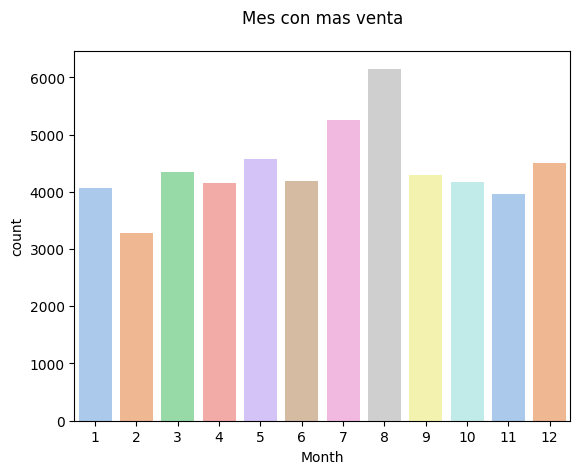

In [41]:

sns.countplot(x=df["Month"], palette="pastel")
plt.title("Mes con mas venta", pad=20)
plt.show()


In [42]:
dict_categories

{'Nest-USA': 0,
 'Office': 1,
 'Apparel': 2,
 'Bags': 3,
 'Drinkware': 4,
 'Lifestyle': 5,
 'Waze': 6,
 'Headgear': 7,
 'Fun': 8,
 'Notebooks & Journals': 9,
 'Google': 10,
 'Nest-Canada': 11,
 'Bottles': 12,
 'Gift Cards': 13,
 'More Bags': 14,
 'Backpacks': 15,
 'Housewares': 16,
 'Android': 17,
 'Nest': 18,
 'Accessories': 19,
 'Notebooks': 20}

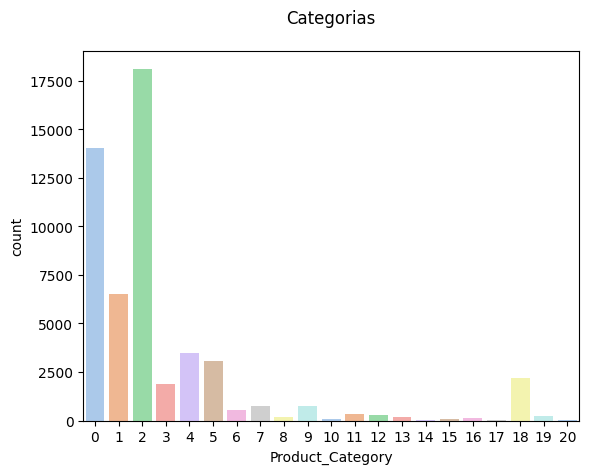

In [43]:
sns.countplot(x=df["Product_Category"], palette="pastel")
plt.title("Categorias", pad=20)
plt.show()

##Que sexo compra mas?

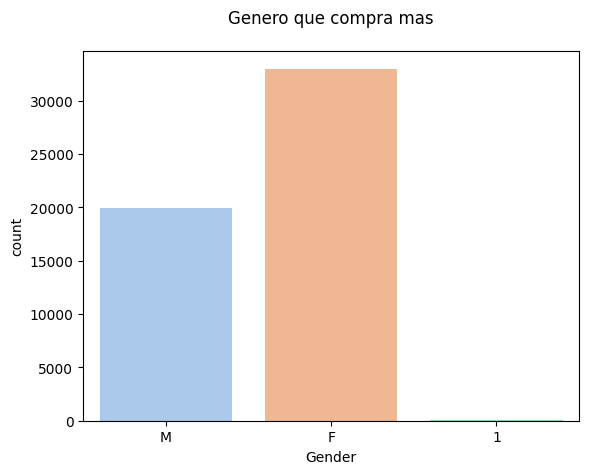

In [62]:
sns.countplot(x=df["Gender"], palette="pastel")
plt.title("Genero que compra mas", pad=20)
plt.show()

###Que categoria se vende mas dependiendo el mes


In [59]:
# Calcular la categoría que se vende más por mes
category_counts = df.groupby(['Month', 'Product_Category']).size().unstack()

# Crear un gráfico interactivo usando  Plotly
fig = px.bar(category_counts, barmode='stack')

#Titulos para identificar
fig.update_layout(
    title='Ventas por Categoría y Mes',
    xaxis=dict(title='Mes'),
    yaxis=dict(title='Número de Ventas'),
    legend=dict(title='Categoría'),
)

# Mostrar el gráfico interactivo
fig.show()

In [60]:
dict_categories

{'Nest-USA': 0,
 'Office': 1,
 'Apparel': 2,
 'Bags': 3,
 'Drinkware': 4,
 'Lifestyle': 5,
 'Waze': 6,
 'Headgear': 7,
 'Fun': 8,
 'Notebooks & Journals': 9,
 'Google': 10,
 'Nest-Canada': 11,
 'Bottles': 12,
 'Gift Cards': 13,
 'More Bags': 14,
 'Backpacks': 15,
 'Housewares': 16,
 'Android': 17,
 'Nest': 18,
 'Accessories': 19,
 'Notebooks': 20}

###Que categoria compran mas los hombres y mujeres



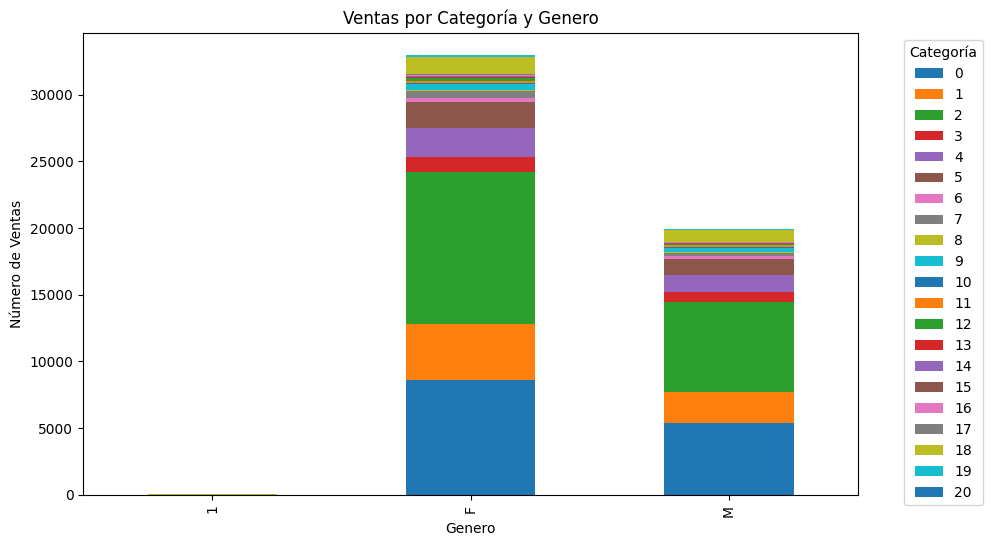

In [50]:
# Calcular la categoría que se vende más por mes
category_counts = df.groupby(['Gender', 'Product_Category']).size().unstack()

# Graficar
category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ventas por Categoría y Genero')
plt.xlabel('Genero')
plt.ylabel('Número de Ventas')
#Segmentar el color de cada categoria
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

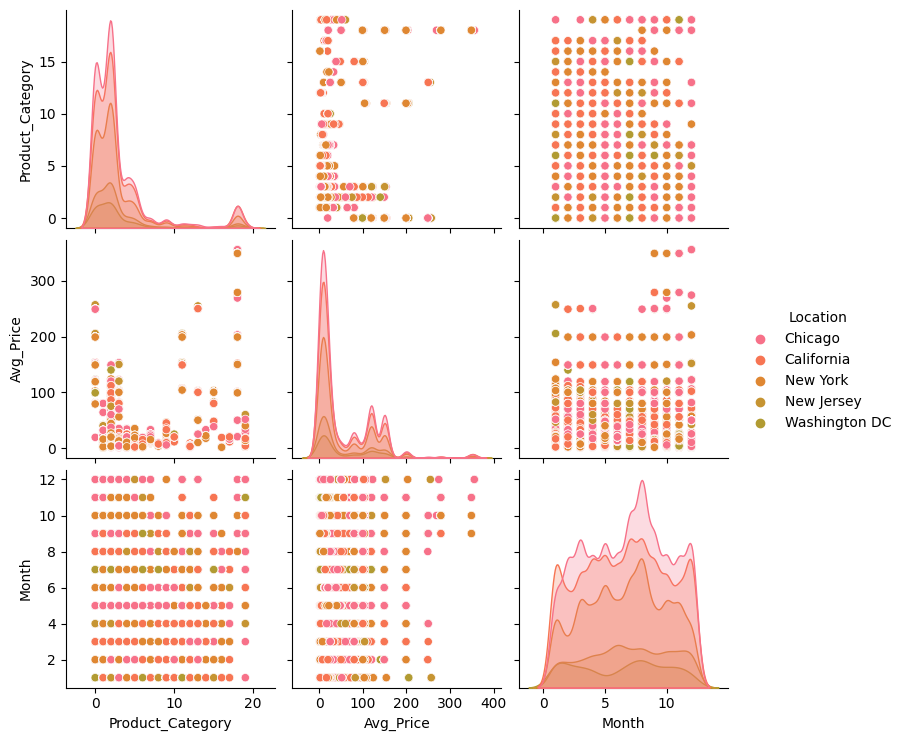

In [61]:
sns.pairplot(data=df, hue="Location")
plt.show()

In [162]:
# Agrupar por estado y categoría de producto y sumar las ventas
df_map = df.groupby(['Location', 'Product_Category']).size().unstack().reset_index()

print(df_map)

Product_Category       Location     0     1     2    3     4     5    6    7  \
0                    California  4184  1993  5491  539  1117   977  146  221   
1                       Chicago  4855  2273  6158  731  1252  1086  203  264   
2                    New Jersey  1203   522  1627  151   284   251   48   62   
3                      New York  2975  1409  3902  383   675   624  124  191   
4                 Washington DC   796   316   948   78   155   154   33   33   

Product_Category   8  ...  10   11  12  13  14  15  16  17   18  19  
0                 44  ...  40   91  91  27  15  29  38  13  762  80  
1                 56  ...  33  120  85  89  17  34  50  18  710  86  
2                 14  ...   6   23  27  18   5   8   4   4  188  17  
3                 32  ...  22   63  54  24   8  14  23   7  421  41  
4                 14  ...   4   20  11   1   1   4   7   1  117  10  

[5 rows x 21 columns]


In [171]:
# Agrupar por estado y categoría de producto y sumar las ventas
df_map = df.groupby(['Location', 'Product_Category']).size().unstack().reset_index()

# Convertir las cantidades a números antes de encontrar la categoría con menores ventas
df_map['Menor_Categoria'] = df_map.iloc[:, 1:].astype(float).idxmin(axis=1)

# Filtrar para obtener solo la categoría con menores ventas en cada ubicación
df_menor_cat = df_map[['Location', 'Menor_Categoria']]

# Mostrar el resultado
print(df_menor_cat)

Product_Category       Location  Menor_Categoria
0                    California               17
1                       Chicago               14
2                    New Jersey               16
3                      New York               17
4                 Washington DC               13


In [183]:
import plotly.express as px

fig = px.choropleth(
    df_menor_cat,
    locations='Location',
    locationmode='USA-states',
    color='Menor_Categoria',
    scope='usa',
    labels={'Menor_Categoria': 'Categoría Menos Vendida'}
)

fig.update_layout(
    geo=dict(
        scope='usa',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()

## Paso 6. Pega aquí el link de la carpeta de drive en donde está esté notebook y el dataset que utilizaste (es decir tu carpeta de drive con los resultados)

[Carpeta de actividades](https://drive.google.com/drive/folders/1zMJNOZOlQYxuuYzjPmvIaAyaZqecnfiv?usp=sharing)